<a href="https://colab.research.google.com/github/walkerjian/Physics/blob/main/AiryDiks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

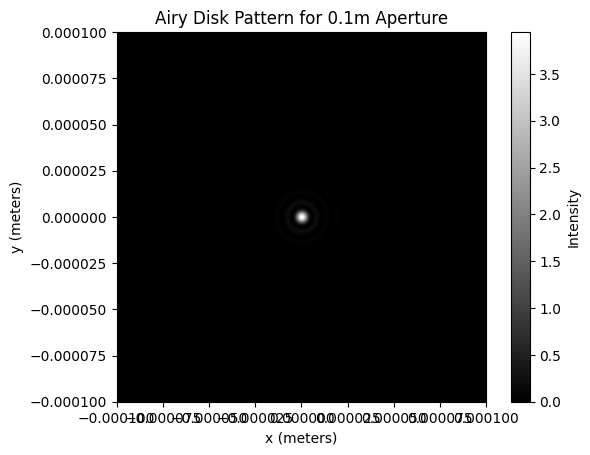

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
wavelength = 550e-9  # 550 nm
k = 2 * np.pi / wavelength
aperture_radius = 0.05  # Half of 0.1m

# Generate a meshgrid for x and y values
x = np.linspace(-0.0001, 0.0001, 400)
y = np.linspace(-0.0001, 0.0001, 400)
X, Y = np.meshgrid(x, y)

# Calculate the radial distance from the center
R = np.sqrt(X**2 + Y**2)

# Calculate the Airy disk intensity
intensity = (2 * np.sinc(aperture_radius * k * R / np.pi))**2

# Plot
plt.imshow(intensity, extent=[-0.0001, 0.0001, -0.0001, 0.0001], cmap='gray', origin='lower')
plt.colorbar(label='Intensity')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('Airy Disk Pattern for 0.1m Aperture')
plt.show()


In [2]:
pip install ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.2 MB/s eta 0:00:00


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatLogSlider
from matplotlib.colors import LogNorm

def plot_airy_disk(wavelength=550e-9, zoom=5e-6, plot_type='Density'):
    k = 2 * np.pi / wavelength
    aperture_radius = 0.05  # Half of 0.1m

    # Generate a meshgrid for x and y values
    x = np.linspace(-zoom, zoom, 400)
    y = np.linspace(-zoom, zoom, 400)
    X, Y = np.meshgrid(x, y)

    # Calculate the radial distance from the center
    R = np.sqrt(X**2 + Y**2)

    # Calculate the Airy disk intensity
    intensity = (2 * np.sinc(aperture_radius * k * R / np.pi))**2

    # Plot
    if plot_type == 'Density':
        plt.imshow(intensity, extent=[-zoom, zoom, -zoom, zoom], cmap='gray', origin='lower', norm=LogNorm())
        plt.colorbar(label='Log(Intensity)')
    elif plot_type == 'Surface':
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, intensity, cmap='gray', norm=LogNorm())
        ax.set_zlabel('Log(Intensity)')
    plt.xlabel('x (meters)')
    plt.ylabel('y (meters)')
    plt.title('Airy Disk Pattern for 0.1m Aperture')
    plt.show()

# Interactive sliders
interact(plot_airy_disk,
         wavelength=FloatSlider(min=400e-9, max=700e-9, step=10e-9, value=550e-9, description='Wavelength (m)'),
         zoom=FloatLogSlider(base=10, min=-7, max=-5, step=0.1, value=5e-6, description='Zoom'),
         plot_type=['Density', 'Surface'])


interactive(children=(FloatSlider(value=5.5e-07, description='Wavelength (m)', max=7e-07, min=4e-07, step=1e-0…

<function __main__.plot_airy_disk(wavelength=5.5e-07, zoom=5e-06, plot_type='Density')>